In [6]:
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd
import chart_studio.plotly as py

def get_zvalue(a, b, x, y):
    """
    Finds the roots of the polynomial in z
    for given values of
    a, b, x, y.
    """
    constant = x ** 2 + ((1 + b) * y) ** 2 - 1
    c0 = constant ** 3
    c1 = 0.0
    c2 = 3 * (constant ** 2)
    c3 = -(a * (y ** 2) + x ** 2)
    c4 = 3 * constant
    c5 = 0.0
    c6 = 1.0

    coefficients = [c6, c5, c4, c3, c2, c1, c0]
    rts = np.roots(coefficients)
    z = rts[~np.iscomplex(rts)]

    if len(z) > 0:
        zreal = z.real
        return zreal
    else:
        return []


def draw_heart(a=9/200, b=0.01, grid=0.10, palette='viridis'):
    """
    Draws the figure
    @param a: a>0
    @param b:
    @param grid: sparsity of the scatter
    @param palette: palette
    """
    x = np.arange(-2, 2, grid)
    y = x

    all_triplets = []
    for i in x:
        for j in y:
            zaxis = get_zvalue(a, b, i, j)
            for k in zaxis:
                triplet = [i, j, k]
                all_triplets.append(triplet)
    results = np.array(all_triplets).transpose()

    # Save the triplets in a data frame
    xaxis = results[0]
    yaxis = results[1]
    zaxis = results[2]
    df = pd.DataFrame({'x': xaxis, 'y': yaxis, 'z': zaxis})

    # Draw
    fig = go.Figure(data=px.scatter_3d(df, x='x', y='y', z='z',
                                       color='z',
                                       color_continuous_scale=palette,
                                       height=800, width=800,
                                       template="plotly_white"))

    fig.update(layout_coloraxis_showscale=False)

    fig.update_layout(
        title='$\hbox{A Perfect Valentine: } (x^2 + (1+b)^2y^2 +z^2 -1)^3 -(x^2 +ay^2 )z^3$',
        scene=dict(
            xaxis=dict(showticklabels=False, showgrid=False),
            yaxis=dict(showticklabels=False, showgrid=False),
            zaxis=dict(showticklabels=False, showgrid=False),
            bgcolor='white'))
    fig.show()

draw_heart(palette='twilight')

ModuleNotFoundError: No module named 'chart_studio'

C:\Users\Rohan Borse\AppData\Local\Temp\ipykernel_15264\1372266438.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = scipy.linspace(-2,2,1000)
C:\Users\Rohan Borse\AppData\Local\Temp\ipykernel_15264\1372266438.py:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y1 = scipy.sqrt(1-(abs(x)-1)**2)
C:\Users\Rohan Borse\AppData\Local\Temp\ipykernel_15264\1372266438.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5)


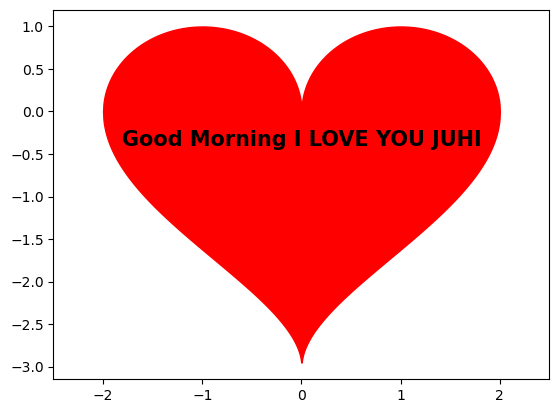

In [2]:
import pylab
import scipy
x = scipy.linspace(-2,2,1000)
y1 = scipy.sqrt(1-(abs(x)-1)**2)
y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5)
pylab.fill_between(x, y1, color='red')
pylab.fill_between(x, y2, color='red')
pylab.xlim([-2.5, 2.5])
pylab.text(0, -0.4, 'Good Morning I LOVE YOU JUHI', fontsize=15, fontweight='bold',
           color='black', horizontalalignment='center')
pylab.savefig('heart.png')